Importing Libraries

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


 Image Display Function

In [29]:
def show_image(title, image):
    # Convert BGR to RGB (OpenCV loads in BGR)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.title(title)
    plt.axis('off')
    plt.show()


Hiding Function (Encryption)

In [30]:
def hide_image(cover_img, secret_img):
    # Resize secret image to match the cover image size
    secret_img = cv2.resize(secret_img, (cover_img.shape[1], cover_img.shape[0]))

    # Create a blank image to hold the result
    encoded_img = np.zeros_like(cover_img)

    # Process each RGB channel
    for i in range(3):  # R, G, B
        cover_part = cover_img[:, :, i] & 0b11110000      # Keep upper 4 bits
        secret_part = secret_img[:, :, i] >> 4            # Take upper 4 bits of secret image
        encoded_img[:, :, i] = cover_part | secret_part   # Combine them

    return encoded_img


 Revealing Function (Decryption)

In [31]:
def extract_hidden_image(encoded_img):
    # Create a blank image for the hidden output
    extracted_img = np.zeros_like(encoded_img)

    # Process each RGB channel
    for i in range(3):  # R, G, B
        hidden_part = (encoded_img[:, :, i] & 0b00001111) << 4  # Get lower 4 bits and shift them
        extracted_img[:, :, i] = hidden_part

    return extracted_img


 Loading Images

In [32]:
# Load the cover image (larger visible image)
cover = cv2.imread("/content/cover.png")

# Load the secret image (the image you want to hide)
secret = cv2.imread("/content/image.png")
if cover is None or secret is None:
    print("One or both images not found. Please check filenames.")

Encoding + Saving the Stego Image

In [33]:
# Call the function to encode
stego_image = hide_image(cover, secret)

# Save the output image with hidden data
cv2.imwrite("stego_image.png", stego_image)
print("Stego image saved as 'stego_image.png'")


Stego image saved as 'stego_image.png'


 Decoding + Saving Revealed Secret

In [34]:
# Call the function to decode
revealed_secret = extract_hidden_image(stego_image)

# Save the revealed secret image
cv2.imwrite("revealed_secret.png", revealed_secret)
print("Hidden image extracted and saved as 'revealed_secret.png'")


Hidden image extracted and saved as 'revealed_secret.png'


Displaying Images

Stego image saved as 'stego_image.png'


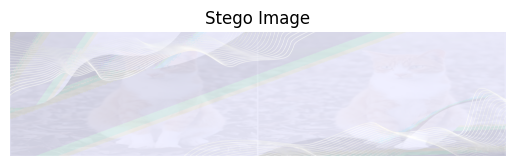

Revealed secret image saved as 'revealed_secret.png'


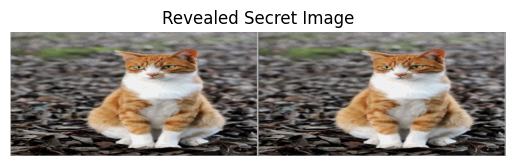

In [35]:
# Save and display stego image
cv2.imwrite("stego_image.png", stego_image)
print("Stego image saved as 'stego_image.png'")
show_image("Stego Image", stego_image)

# Save and display revealed secret image
cv2.imwrite("revealed_secret.png", revealed_secret)
print("Revealed secret image saved as 'revealed_secret.png'")
show_image("Revealed Secret Image", revealed_secret)
